# EOSC 511 Lab4 ( Xiaoxin Yu )
### List of Problems 

<!-- {#list-of-problems .unnumbered} -->

- [Problem tableau](#problem_tableau)

- [Problem Runge Kutta4](#problem_rk4)

- [Problem embedded](#problem_embedded)

- [Problem coding A](#prob_a)

- [Problem coding B](#prob_b)

- [Problem coding C](#prob_c)




<a name="problem_tableau"></a>

**Problem tableau**: Write out the tableau for

1.  Heun’s method

2.  the fourth-order Runge-Kutta method 

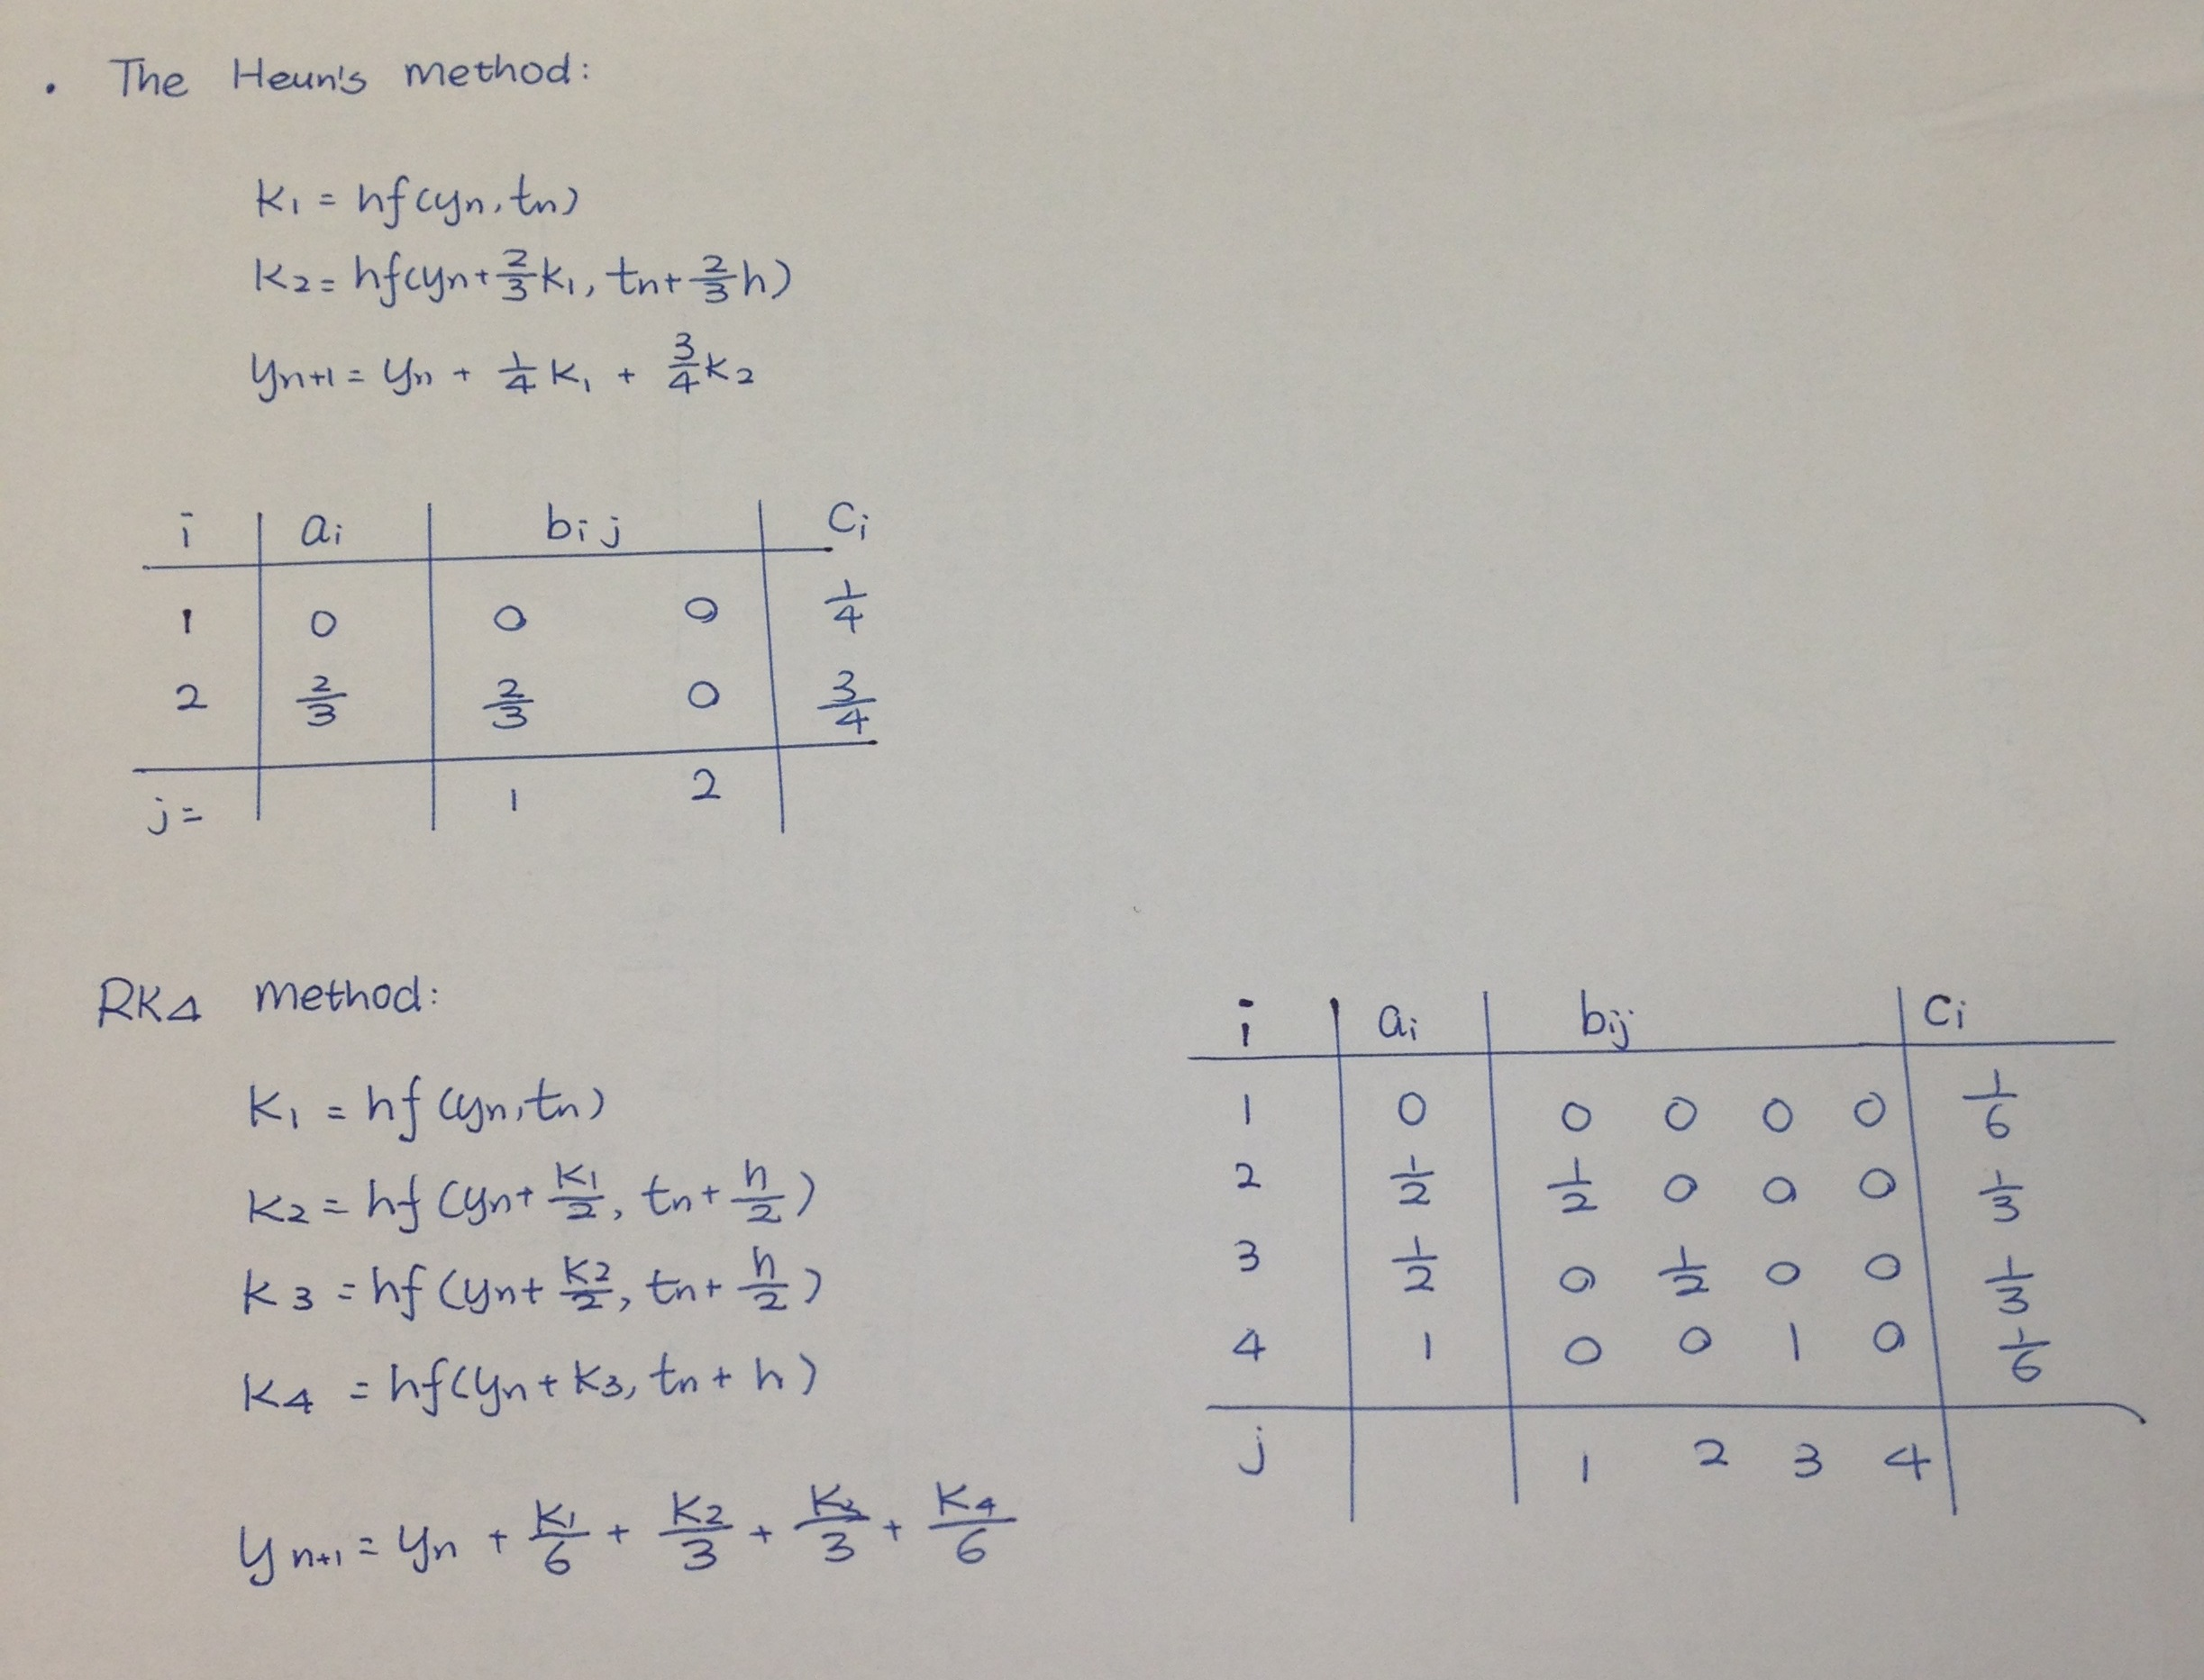

In [2]:
from IPython.display import Image
Image(filename="numlabs/image1.JPG")


<!-- \label{lab4:eq:rk4}  -->
<a name="problem_rk4"></a>
**Problem rk4**: In the demo below, compare compare solutions to the test
problem (eq: test)

$$
\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1\ \ \ \mathbf{eq: test}
$$ 

generated with the
fourth-order Runge-Kutta method to solutions generated by the forward
Euler and midpoint methods.

1.  Based on the numerical solutions of (eq: test), which of the
    three methods appears more accurate?

2.  Again determine how the error changes relative to the change in
    stepsize, as the stepsize is halved.

In [185]:
def plot_Q1(dt):
    '''define a function to plot different stepsize'''
    from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41, rk4ODEinter41
    initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':dt,'c1':-1.,'c2':1.,'c3':1.}
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ye=[]
    ym=[]
    yrk=[]
    y=coeff.yinitial
    ye.append(coeff.yinitial)
    ym.append(coeff.yinitial)
    yrk.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=eulerinter41(coeff,y,timeVec[i-1])
        ye.append(ynew)
        ynew=midpointinter41(coeff,y,timeVec[i-1])
        ym.append(ynew)
        ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
        yrk.append(ynew)
        y=ynew
    analytic=timeVec + np.exp(-timeVec)
    theFig=plt.figure(figsize=(13,5))
    theFig.clf()
    theAx=theFig.add_subplot(121)
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,ye,'r-',label='euler')
    l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
    l4=theAx.plot(timeVec,yrk,'m-',label='rk4')
    theAx.legend(loc='best')
    theAx.set_title('interactive 4.2')

    theAx=theFig.add_subplot(122)
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,ye-analytic,'r--',label='euler')
    l3=theAx.plot(timeVec,ym-analytic,'g-.',label='midpoint')
    l4=theAx.plot(timeVec,yrk-analytic,'m-',label='rk4')
    print ('Difference between analytical solution and euler   :[%s,%s]'%((ye-analytic).min(),(ye-analytic).max()))
    print ('Difference between analytical solution and midpoint:[%s,%s]'%((ym-analytic).min(),(ym-analytic).max()))
    print ('Difference between analytical solution and rk4     :[%s,%s]'%((yrk-analytic).min(),(yrk-analytic).max()))
    theAx.legend(loc='best')
    theAx.set_title('Difference between analytical solution and numerical solution')

### Answers to problem rk4

**Answer to Q1:**

Based on the error plots at the right hand side above, we can say **the Runge_kutta method is more accurate** than the other two methods. 

**Answer to Q2:** 

if the step is halved, the error is **nearly 16 times smaller**. The statement is proved in the following cell:

Difference between analytical solution and euler   :[-0.00483741803596,0.0]
Difference between analytical solution and midpoint:[0.0,0.00016258196404]
Difference between analytical solution and rk4     :[0.0,3.31459476755e-07]


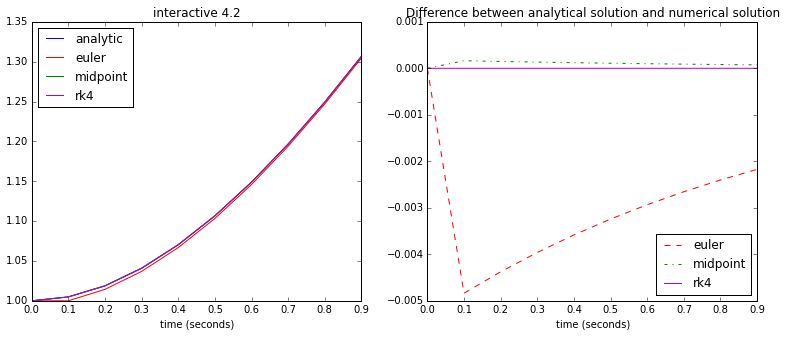

In [186]:
plot_Q1(0.1)

Difference between analytical solution and euler   :[-0.00122942450071,0.0]
Difference between analytical solution and midpoint:[0.0,2.05754992859e-05]
Difference between analytical solution and rk4     :[0.0,1.99502792064e-08]


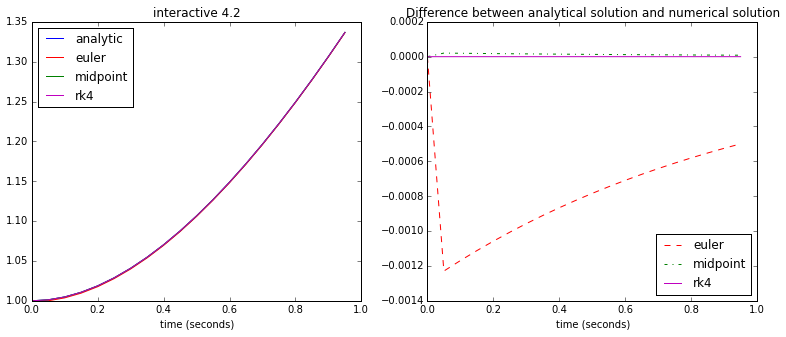

In [187]:
plot_Q1(0.05)

<a name="problem_embedded"></a>
**Problem embedded**: 
Though the error estimate is for the embedded
fourth-order Runge-Kutta method, the fifth-order method can be used in
practice for calculating the solution, the assumption being the
fifth-order method should be at least as accurate as the fourth-order
method. In the demo below, compare solutions of the test problem
(eq: test2]) 

$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1\ \ \ \mathbf{eq: test2}$$

generated by the fifth-order method with solutions generated by the
standard fourth-order Runge-Kutta method. Which method
is more accurate? Again, determine how the error decreases as you halve
the stepsizes. 

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from numlabs.lab4.lab4_functions import initinter41,rk4ODEinter41,rkckODEinter41
%matplotlib inline

def plot_Q2(dt):
    initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':dt,'c1':-1.,'c2':1.,'c3':1.}
    coeff = initinter41(initialVals)

    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ye=[]
    ym=[]
    yrk=[]
    yrkck=[]
    y1=coeff.yinitial
    y2=coeff.yinitial
    yrk.append(coeff.yinitial)
    yrkck.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
        yrk.append(ynew)
        y1=ynew 
        ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
        yrkck.append(ynew)
        y2=ynew 
    analytic=timeVec + np.exp(-timeVec)
    theFig=plt.figure(figsize=(13,5))
    theFig.clf()
    theAx=theFig.add_subplot(121)
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,yrkck,'g-',label='rkck')
    l3=theAx.plot(timeVec,yrk,'m-',label='rk')
    theAx.legend(loc='best')
    theAx.set_title('interactive 4.3')

    theAx=theFig.add_subplot(122)
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,yrkck-analytic,'r--',label='rkck')
    l4=theAx.plot(timeVec,yrk-analytic,'m-',label='rk4')
    theAx.legend(loc='best')
    theAx.set_title('Error')
    print ('Difference between analytical solution and rkck:[%s,%s]'%((yrkck-analytic).min(),(yrkck-analytic).max()))
    print ('Difference between analytical solution and rk4     :[%s,%s]'%((yrk-analytic).min(),(yrk-analytic).max()))
    plt.show()

### Answers to problem embeded

**Answer to Q1: **

The error plots above shows the error from the fifth-order method is much smaller than the fourth-order one. Therefore, **the fifth-order method (rkck)** is more accurate.

**Answer to Q2: **

If the step is halved, **the error is nearly 32 times smaller**. **The statement can be proved by the following calculations:**


Difference between analytical solution and rkck:[-4.82415885017e-10,0.0]
Difference between analytical solution and rk4     :[0.0,3.31459476755e-07]


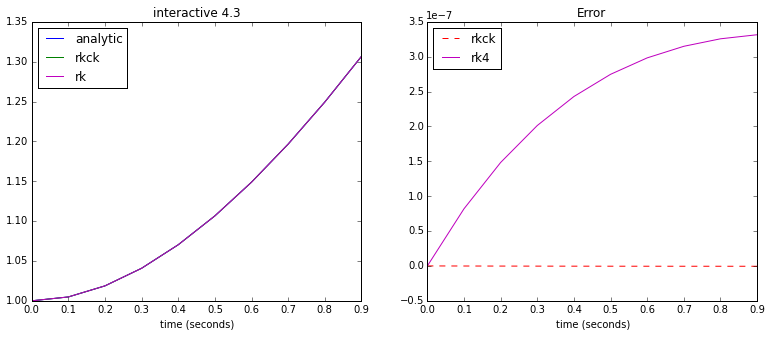

In [15]:
plot_Q2(0.1)

Difference between analytical solution and rkck:[-1.55739865448e-11,0.0]
Difference between analytical solution and rk4     :[0.0,1.99502792064e-08]


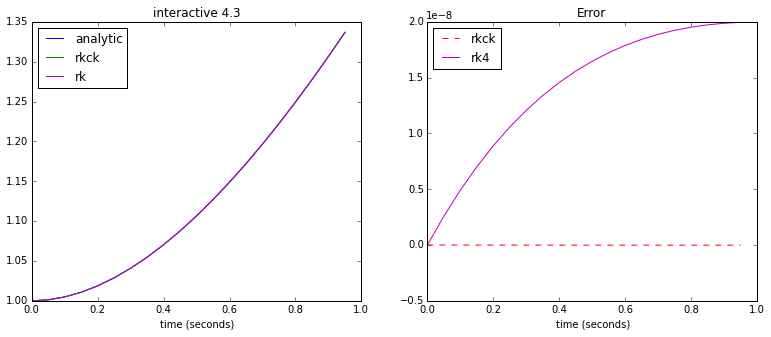

In [14]:
plot_Q2(0.05)

##### <a name="prob_a"></a>

**problem coding A**: Try out [the lab4 example](https://github.com/phaustin/numeric/tree/master/numlabs/lab4/example):

As set up above, test.py
solved the damped, harmonic oscillator with the (unstable) forward Euler method.

1.  Write a new routine that solves the harmonic oscilator using [Heun’s method](#eq_heuns)
    along the lines of the routines in [lab4_functions.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab4/lab4_functions.py)

    Hand in a notebook with the code and a plot.

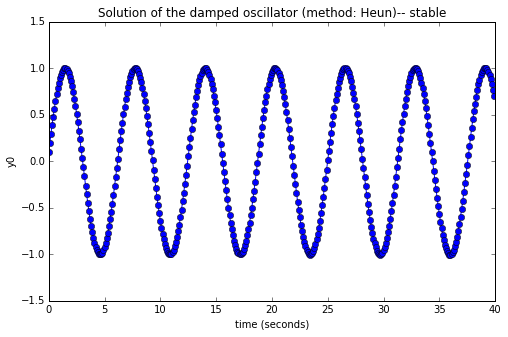

In [5]:
%matplotlib inline
import json
from numlabs.lab4.example.test import read_init,euler4,heun

def derivs(coeff, y):
  f=np.empty_like(y) 
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f

initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':40.,'dt':0.1,'c1':0.,'c2':1.}
initialVals['comment'] = 'modified on Oct. 8, 2015'
initialVals['plot_title'] = 'Solution of the damped oscillator (method: Heun)-- stable'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
        
infile='run_1.json'
coeff=read_init(infile)

time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)


for i in range(nsteps):
    y=heun(coeff,y,derivs)
    savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,5))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')       



<a name="prob_b"></a>    
**problem coding B**:

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. $$f(y,t) = t - y  + 1.0$$ Choose two sets
    of initial conditions and investigate the behaviour.

2.  Is there any difference between the two methods when applied to
    either problem? Should there be? Explain by analyzing the steps
    that each method is taking.


In [16]:
import numpy as np
from numlabs.lab4.lab4_functions import heun,midpointinter41,initinter41
from matplotlib import pyplot as plt
def heun_mid(yinitial,t_beg,t_end):
    initialVals={'yinitial': yinitial,'t_beg':t_beg,'t_end':t_end,'dt':0.05,'c1':-1.,'c2':1.,'c3':1.}
    coeff = initinter41(initialVals)
    print coeff
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ym=[]
    yh=[]
    y=coeff.yinitial
    ym.append(coeff.yinitial)
    yh.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=heun(coeff,y,timeVec[i-1])
        yh.append(ynew)
        ynew=midpointinter41(coeff,y,timeVec[i-1])
        ym.append(ynew)
        y=ynew
    analytic=timeVec + np.exp(-timeVec)
    theFig=plt.figure(figsize=(18,3))
    theFig.clf()
    theAx=theFig.add_subplot(141)
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,yh,'r-',label='heun')
    l3=theAx.plot(timeVec,ym,'m-',label='midpoint')
    theAx.legend(loc='best')
    theAx.set_title('interactive 4.2')

    theAx=theFig.add_subplot(142)
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,yh-analytic,'r--',label='heun')
    theAx.set_title('Error')
    theAx.legend(loc='best')
    theAx=theFig.add_subplot(143)
    theAx.set_xlabel('time (seconds)')
    l4=theAx.plot(timeVec,ym-analytic,'m-',label='midpoint')
    theAx.set_title('Error')
    theAx.legend(loc='best')
    theAx=theFig.add_subplot(144)
    theAx.set_xlabel('time (seconds)')
    l4=theAx.plot(timeVec,np.array(ym)-np.array(yh),'b--',label='midpoint-heun')
    theAx.set_title('Error Difference')
    theAx.legend(loc='best')

#### Answers to problem coding B

**Answer to Q1:**

The two sets of initial condition I chose is y=1 and y=0.5 at t=0, respectively. I made the both of the runs stopped at t=5s and both of them have dt=0.05. Apparently, if the initial condition I gave is away from the real solution, the numerical solution will take longer time to get close to the real solution. And in general, the behaviors of the midpoint and the Heun's method looks similar.

initvals(dt=0.05, c1=-1.0, c2=1.0, c3=1.0, t_beg=0, t_end=5, yinitial=1)


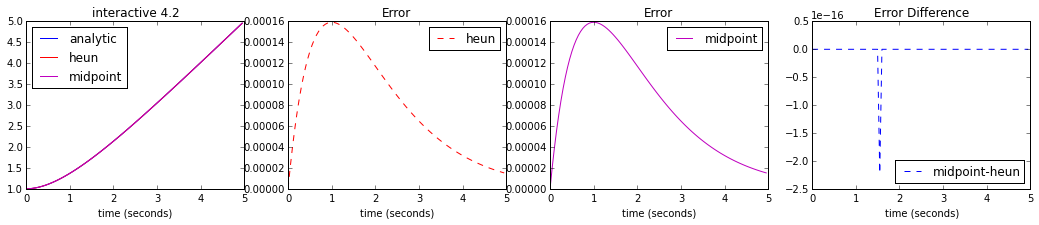

In [17]:
heun_mid(1,0,5)
#initial condition: y=1 when t=0, the run stopped at t=5s

initvals(dt=0.05, c1=-1.0, c2=1.0, c3=1.0, t_beg=0, t_end=5, yinitial=0.5)


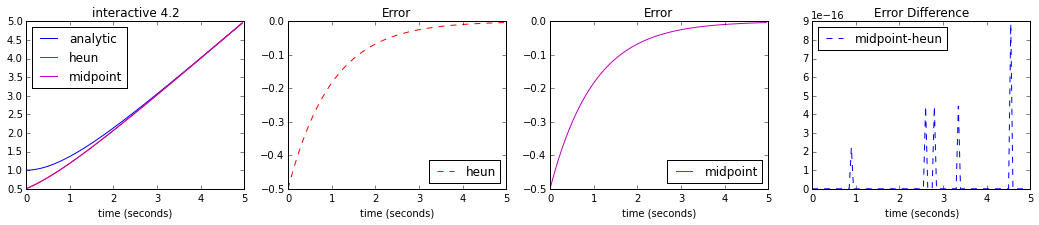

In [18]:
heun_mid(0.5,0,5)
#initial condition: y=0.5 when t=0, the run stopped at t=5s

**Answer to Q2:** 

Both the midpoint and Heun's methods are **comparable in accuracy**. But the **step of predicting** is a littlt bit different. 

For the midpoint method, the function is trying to use the slope in y$_{i+\frac{1}{2}}$ to predict the solution in y$_{i+1}$. Its slope = f(x$_{i+\frac{1}{2}}$,y$_{i+\frac{1}{2}}$). 

So y$_{i+1}$=$y_{i} +hf$(x$_{i+\frac{1}{2}}$,y$_{i+\frac{1}{2}}$) 

As for the Heun's method, the slope is a combination of predictor and corrector. It equals to 1/4 of the slope from point f($x_{i}$,$y_{i}$) (**predictor**) and 3/4 of the slope from point f($x_{i}+\frac{2}{3}h$,$y_{i}+\frac{2}{3}k_{1}h$) (**corrector**).

Its slope = $\frac{1}{4}f(x_{i},y_{i}) + \frac{3}{4}f(x_{i}+\frac{2}{3}h,y_{i}+\frac{2}{3}k_{1}h)$

So $y_{i+1}$=$y_{i+1}$+$h(\frac{1}{4}k_{1}+\frac{3}{4}k_{2})$

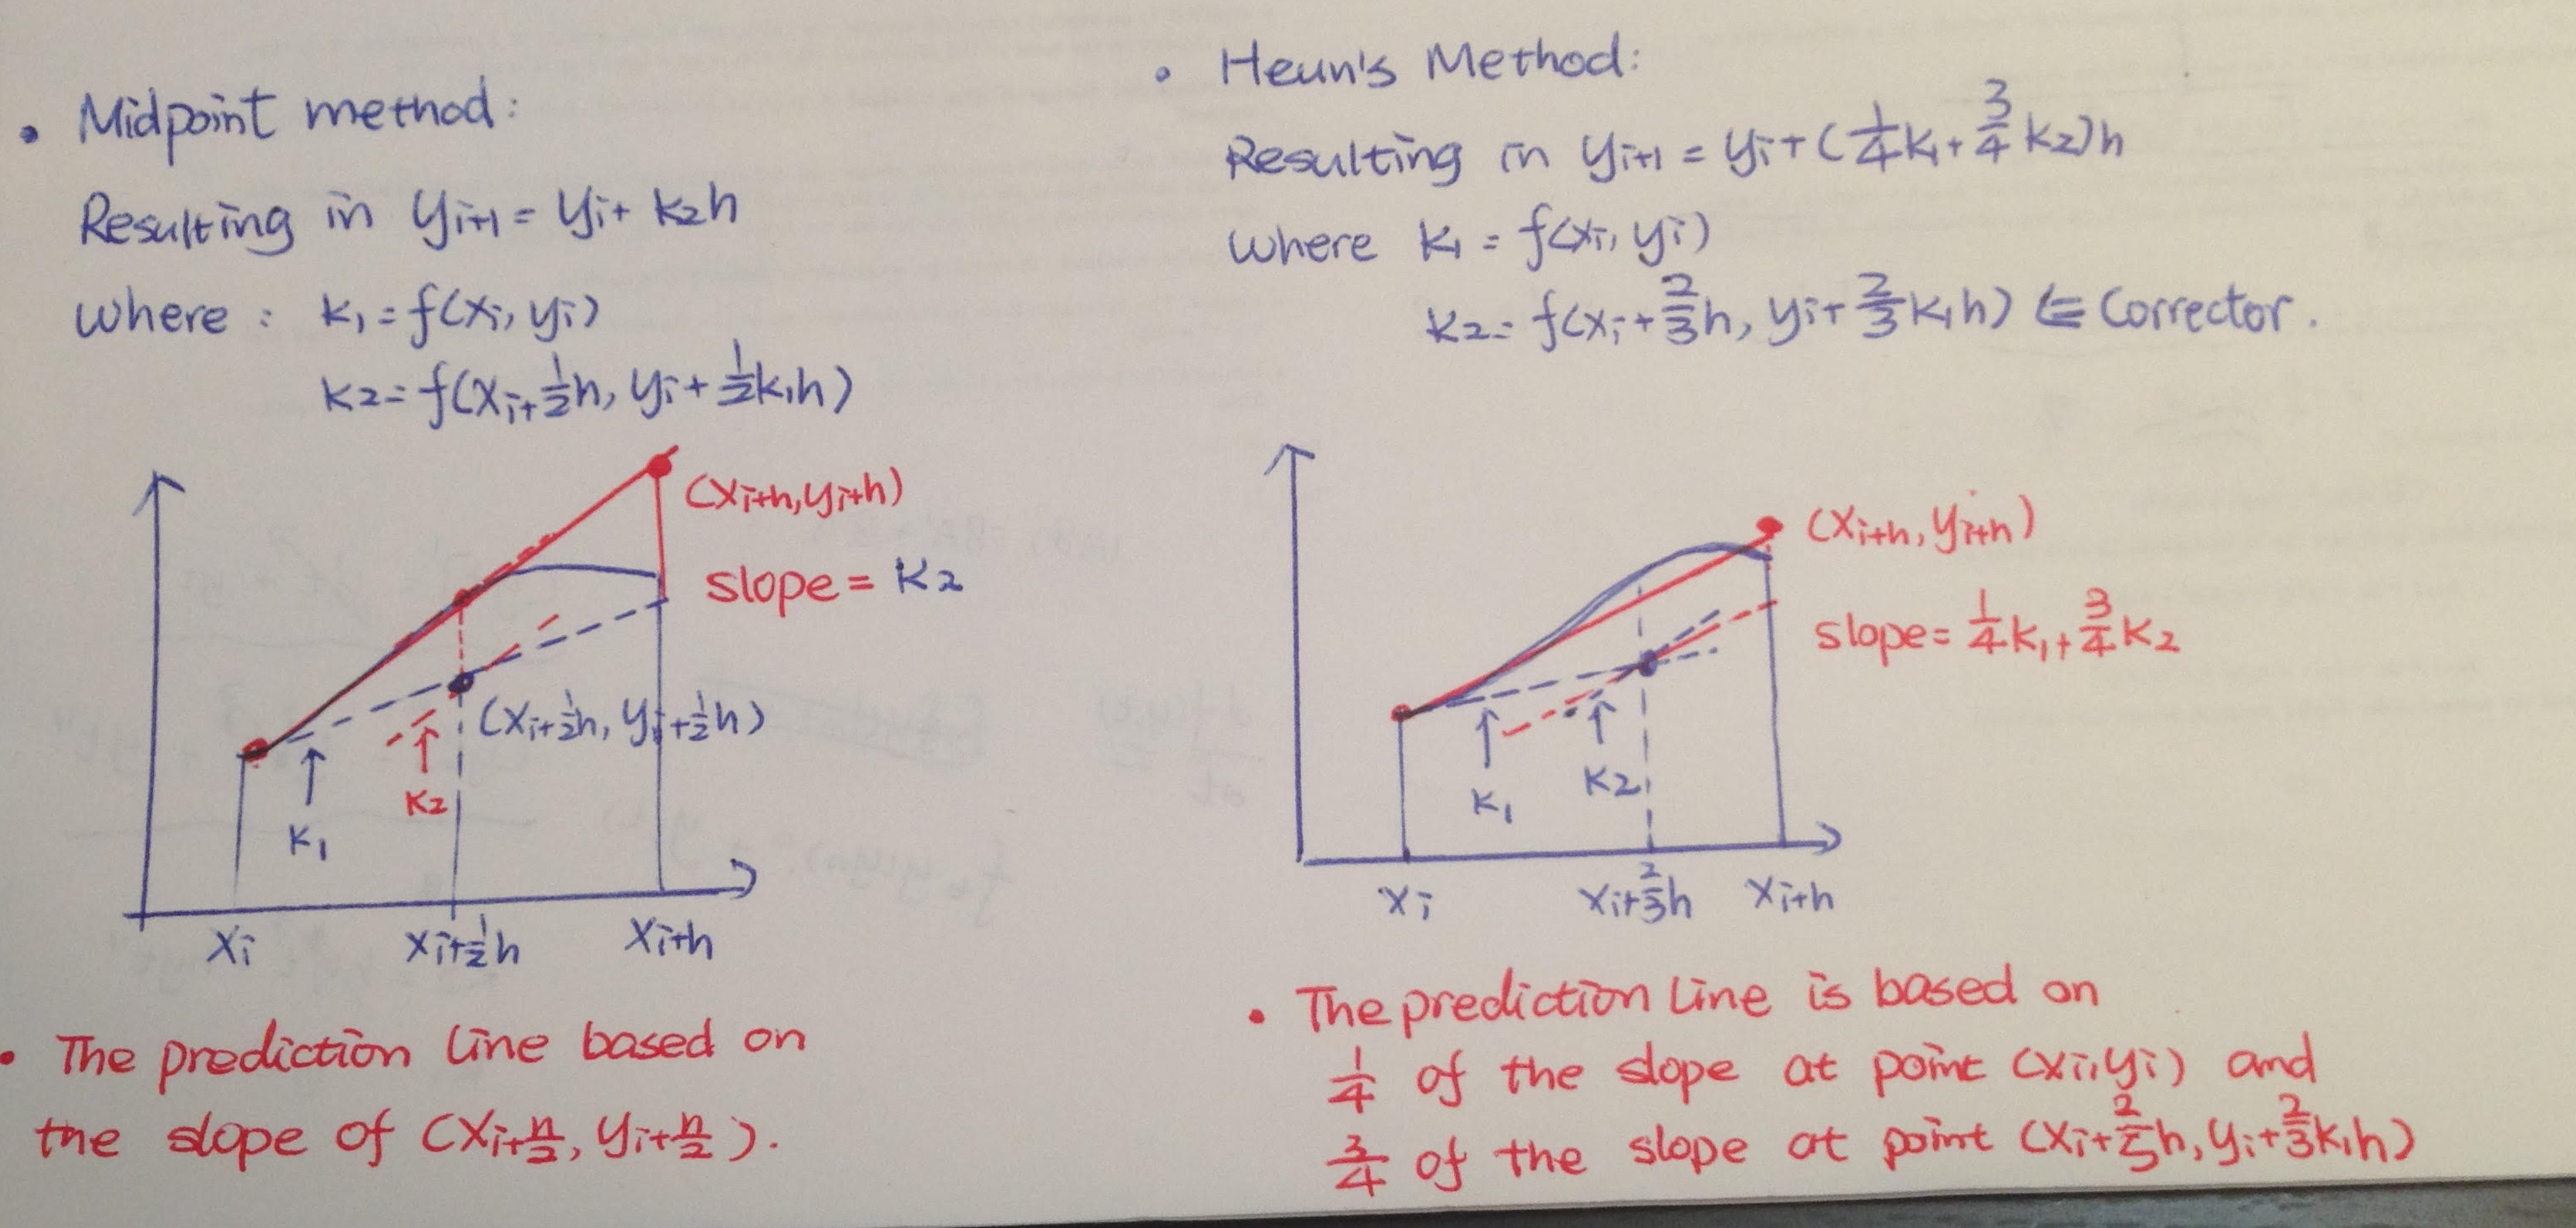

In [7]:
Image(filename="numlabs/image0.jpg")

<a name="prob_c"></a>    
**problem coding C**:

6.  Solve the Newtonian cooling equation of lab 1 by any of the above
    methods. 

7.  Hand in some sample plots along with the parameter values and
    initial conditions used.

In [20]:
import numpy as np
from numlabs.lab4.lab4_functions import heun,midpointinter41,initinter41
from matplotlib import pyplot as plt
def plot_cooling(yinitial,t_beg,lamb,Ta,dt):
    initialVals={'yinitial': yinitial,'t_beg':t_beg,'t_end':50.,'dt':dt,'c1':-lamb,'c2':0.,'c3':lamb*Ta}
    coeff = initinter41(initialVals)
    print coeff
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ym=[]
    yh=[]
    y=coeff.yinitial
    ym.append(coeff.yinitial)
    yh.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=heun(coeff,y,timeVec[i-1])
        yh.append(ynew)
        ynew=midpointinter41(coeff,y,timeVec[i-1])
        ym.append(ynew)
        y=ynew
    analytic=Ta + (yinitial-Ta)*np.exp((-lamb)*timeVec)
    theFig=plt.figure(figsize=(13,3))
    theFig.clf()
    theAx=theFig.add_subplot(121)
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,yh,'r-',label='heun')
    theAx.legend(loc='best')
    theAx.set_title('Newtonian cooling equation')

    theAx=theFig.add_subplot(122)
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,yh-analytic,'r--',label='heun')
    theAx.set_title('Error')
    theAx.legend(loc='best')

I used the **heun's method** to solve the cooling equation. And I tried different initial condition, diffusion coefficience lambda and different dt, which can be seen in each cell. Plots are shown below.

initvals(dt=0.05, c1=-0.08, c2=0.0, c3=1.6, t_beg=0, t_end=50.0, yinitial=25)


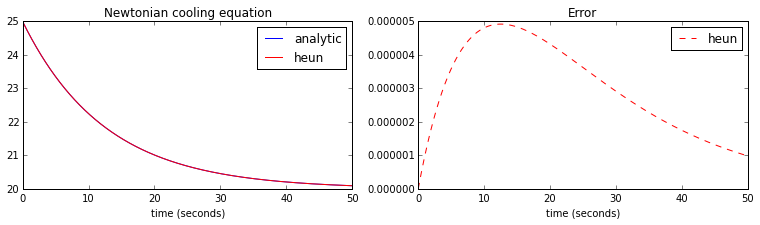

In [166]:
plot_cooling(25,0,0.08,20,0.05)
#initial temperature:25
#lambda             :0.08
#final temperature  :20
#time step dt       :0.05

**The plot with smaller dt**

initvals(dt=1e-05, c1=-0.08, c2=0.0, c3=1.6, t_beg=0, t_end=50.0, yinitial=25)


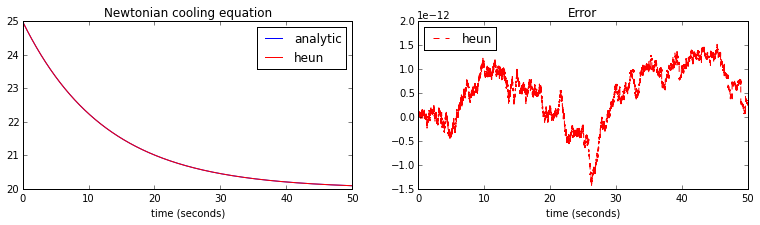

In [169]:
plot_cooling(25,0,0.08,20,0.00001)
#initial temperature:25
#lambda             :0.5
#final temperature  :20
#time step dt       :0.00001

**The plot with higher lambda**

initvals(dt=0.05, c1=-0.5, c2=0.0, c3=10.0, t_beg=0, t_end=50.0, yinitial=25)


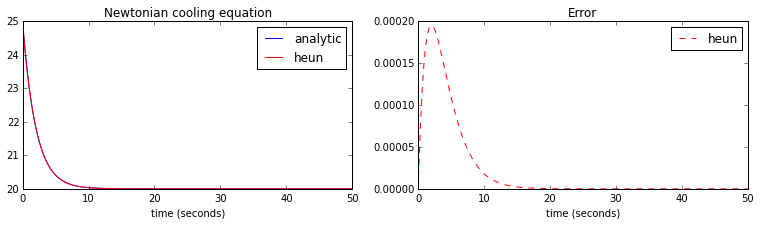

In [168]:
plot_cooling(25,0,0.5,20,0.05)
#initial temperature:25
#lambda             :0.5
#final temperature  :20
#time step dt       :0.05

**The plot with higher initial temperature.**

initvals(dt=0.05, c1=-0.08, c2=0.0, c3=1.6, t_beg=0, t_end=50.0, yinitial=50)


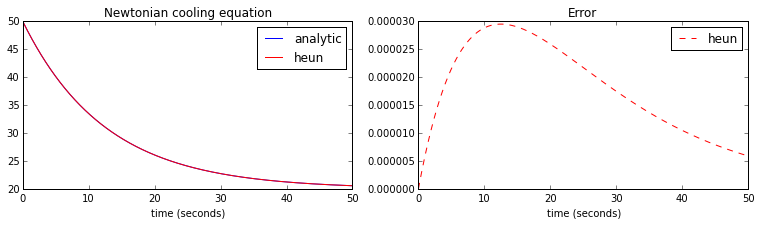

In [26]:
plot_cooling(50,0,0.08,20,0.05)
#initial temperature:50
#lambda             :0.08
#final temperature  :20
#time step dt       :0.05